<a href="https://colab.research.google.com/github/charujhagrawat20/StackIt/blob/main/Prac7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

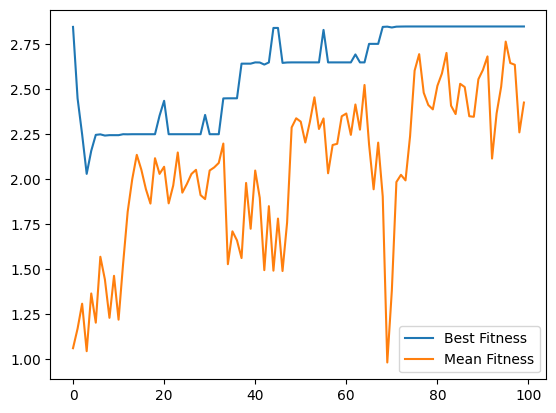

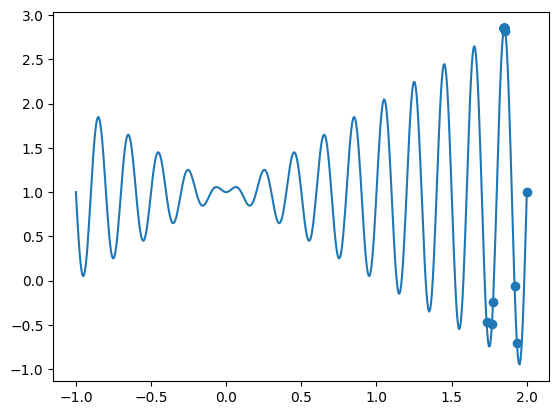

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def fitness_function(x):
    return x * np.sin(10 * np.pi * x) + 1
POP_SIZE = 40
GENERATIONS = 100
X_MIN, X_MAX = -1.0, 2.0
CROSSOVER_PROB = 0.9
MUTATION_PROB = 0.2
MUTATION_STD = 0.1
np.random.seed(42)
population = np.random.uniform(X_MIN, X_MAX, POP_SIZE)
def tournament_selection(pop, fitness, k=3):
    selected = []
    for _ in range(len(pop)):
        idx = np.random.choice(len(pop), k, replace=False)
        selected.append(pop[idx[np.argmax(fitness[idx])]])
    return np.array(selected)
def arithmetic_crossover(p1, p2):
    alpha = np.random.rand()
    return alpha * p1 + (1 - alpha) * p2, alpha * p2 + (1 - alpha) * p1
def mutate(x):
    if np.random.rand() < MUTATION_PROB:
        x += np.random.normal(0, MUTATION_STD)
    return np.clip(x, X_MIN, X_MAX)
best_history = []
mean_history = []
for _ in range(GENERATIONS):
    fitness = fitness_function(population)
    best_history.append(np.max(fitness))
    mean_history.append(np.mean(fitness))
    parents = tournament_selection(population, fitness)
    offspring = []
    np.random.shuffle(parents)
    for i in range(0, POP_SIZE, 2):
        if np.random.rand() < CROSSOVER_PROB:
            c1, c2 = arithmetic_crossover(parents[i], parents[i + 1])
        else:
            c1, c2 = parents[i], parents[i + 1]
        offspring.extend([mutate(c1), mutate(c2)])
    population = np.array(offspring)
x = np.linspace(X_MIN, X_MAX, 500)
plt.figure()
plt.plot(best_history, label="Best Fitness")
plt.plot(mean_history, label="Mean Fitness")
plt.legend()
plt.show()
plt.figure()
plt.plot(x, fitness_function(x))
plt.scatter(population, fitness_function(population))
plt.show()